# Отчёт по лабораторной работе №1 "Линейная регрессия"

In [4]:
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

# 1. Загрузите набор данных ex1data1.txt из текстового файла.

In [5]:
FILENAME = 'ex1data1.txt'
df = pd.read_csv(FILENAME, header=None, names=['population', 'profit'])
X_train, y_train = df['population'], df['profit']
df

,population,profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


# 2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

<IPython.core.display.Javascript object>


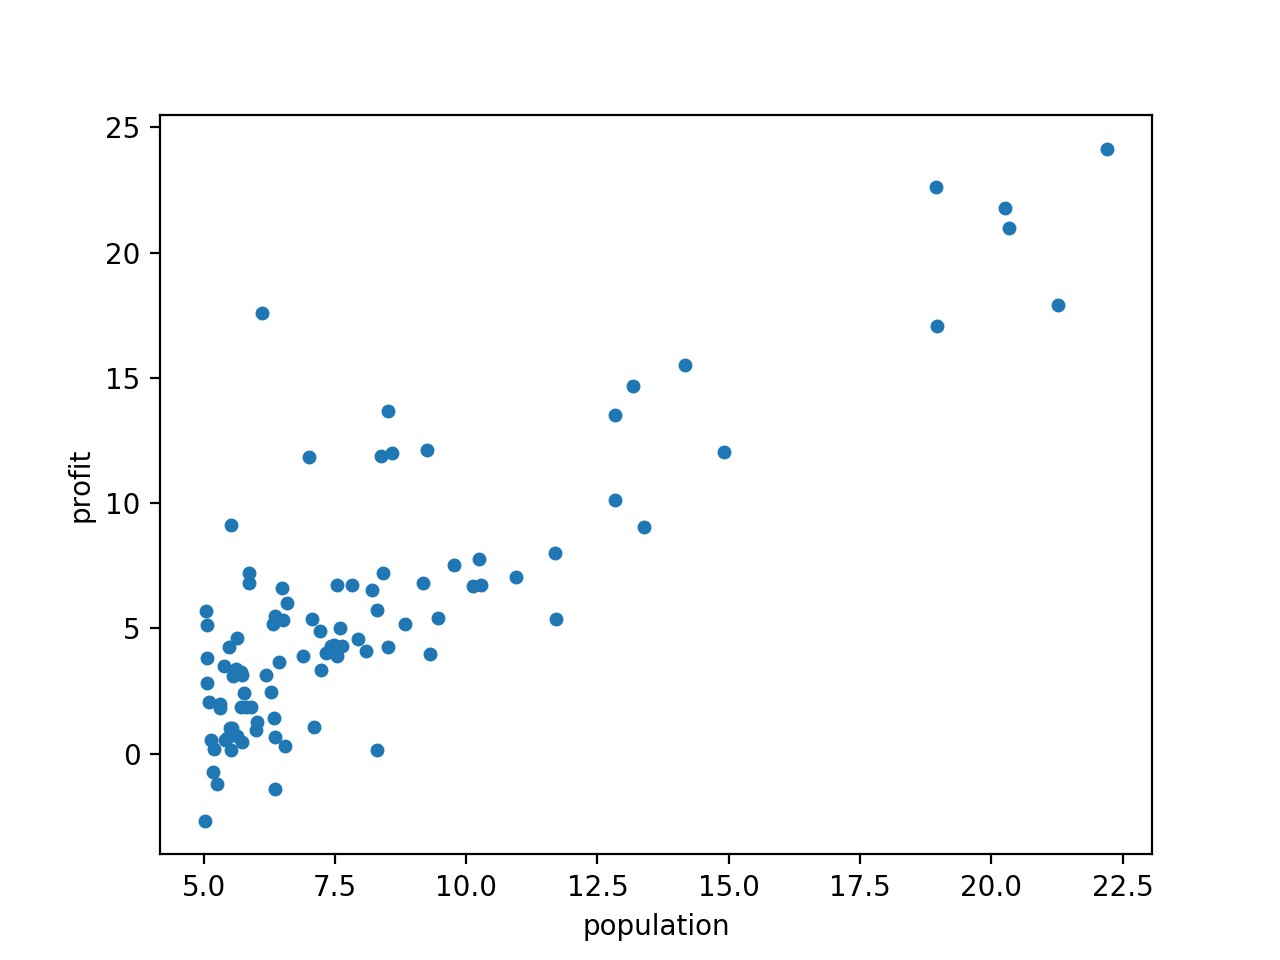

In [6]:
plt.plot(X_train, y_train, 'o', markersize=4)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

# 3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

Функция потерь реализована в классе `LinearRegressionOneVar` c названием `loss_func`.

In [7]:
class LinearRegressionOneVar:

    def __init__(self, max_steps=1000, linear_rate=0.02):
        self.theta_0 = None
        self.theta_1 = None
        self.linear_rate = linear_rate
        self.max_steps = max_steps
        self.__logs = None

    def fit(self, X, y):
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values
    
        self.theta_0 = -1
        self.theta_1 = 1

        cur_step = 0
        cur_loss = self.loss_func(X, y)
        self.__logs = [[cur_step, self.theta_0, self.theta_1, cur_loss]]

        for cur_step in range(self.max_steps):
            self.gradient_descent(X, y)
            new_loss = self.loss_func(X, y)
            
            if cur_step % 10 == 0:
                self.__logs.append([cur_step, self.theta_0, self.theta_1, new_loss])

            cur_loss = new_loss

        if cur_step > self.max_steps:
            raise Exception("Model reached maximum steps number.")

    def gradient_descent(self, X, y):
        hypotesis = self._calculate_hypotises(X, y)
        y_size = y.size
        theta_0 = self.theta_0 - self.linear_rate * np.sum(hypotesis - y) / y_size
        theta_1 = self.theta_1 - self.linear_rate * np.sum(np.multiply(hypotesis - y, X)) / y_size
        self.theta_0, self.theta_1 = theta_0, theta_1
    
    def loss_func(self, X, y, theta_0=None, theta_1=None):
        hypotesis = self._calculate_hypotises(X, y, theta_0, theta_1)
        coef = 1 / (2 * y.size)
        return coef * np.sum((hypotesis - y)**2)

    def predict(self, x):
        if self.theta_0 is None or self.theta_1 is None:
            raise Exception("Model is not trained. Call `fit` method.")

        return self.theta_0 + self.theta_1 * x

    @property
    def logs(self):
        return pd.DataFrame(self.__logs, columns=['iter', 'theta_0', 'theta_1', 'loss'])

    def _calculate_hypotises(self, X, y, theta_0=None, theta_1=None):
        t0 = theta_0 if theta_0 is not None else self.theta_0
        t1 = theta_1 if theta_1 is not None else self.theta_1
        A = np.column_stack((np.ones(X.size), X))
        b = np.array([t0, t1])
        return A.dot(b)

# 4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2.

Функция градиентного спуска реализована в классе `LinearRegressionOneVar` с названием `gradient_descent`. Исходя из графика можно сделать вывод, прямая, иллюстрирующая функцию предсказания, приблизительно подходит под разброс точек.

Function: y = -3.818 + 1.185 * x


<IPython.core.display.Javascript object>


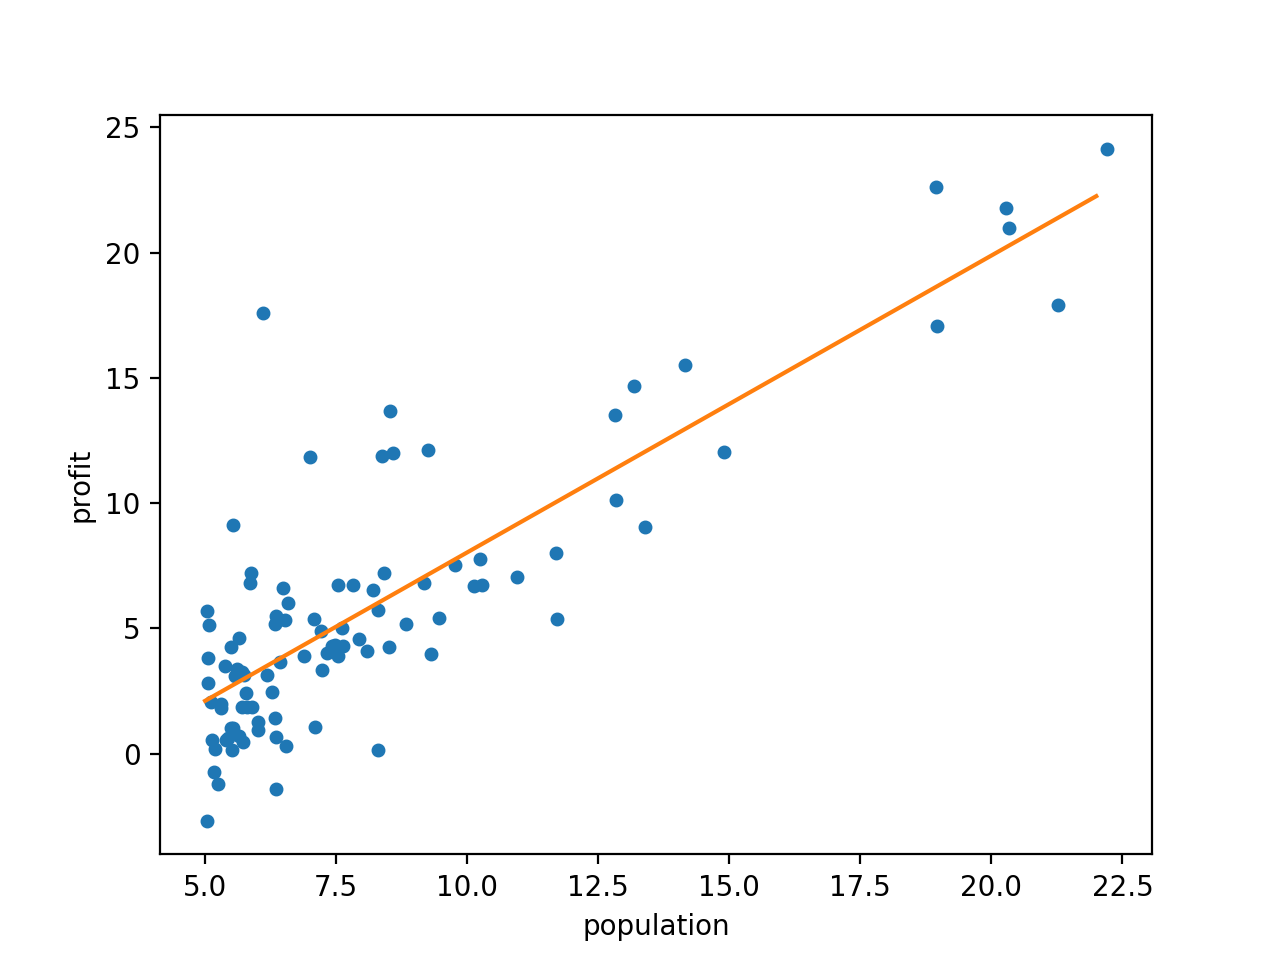

In [8]:
lin = LinearRegressionOneVar(max_steps=1000, linear_rate=0.02)
lin.fit(X_train, y_train)

min_x, max_x = int(min(X_train)), int(max(X_train))
xi = list(range(min_x, max_x + 1))
line = [lin.predict(i) for i in xi]
print(f"Function: y = {round(lin.theta_0, 3)} + {round(lin.theta_1, 3)} * x")
plt.plot(X_train, y_train, 'o', xi, line, markersize=4)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

# 5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

In [9]:
data = lin.logs
data = data[data['theta_1'] > 1]
X, Y = np.meshgrid(data['theta_0'], data['theta_1'])
Z = np.zeros((data['theta_0'].size, data['theta_1'].size))

for i, x in enumerate(data['theta_0']):
    for j, y in enumerate(data['theta_1']):
        Z[i, j] = lin.loss_func(X_train, y_train, x, y)

<IPython.core.display.Javascript object>


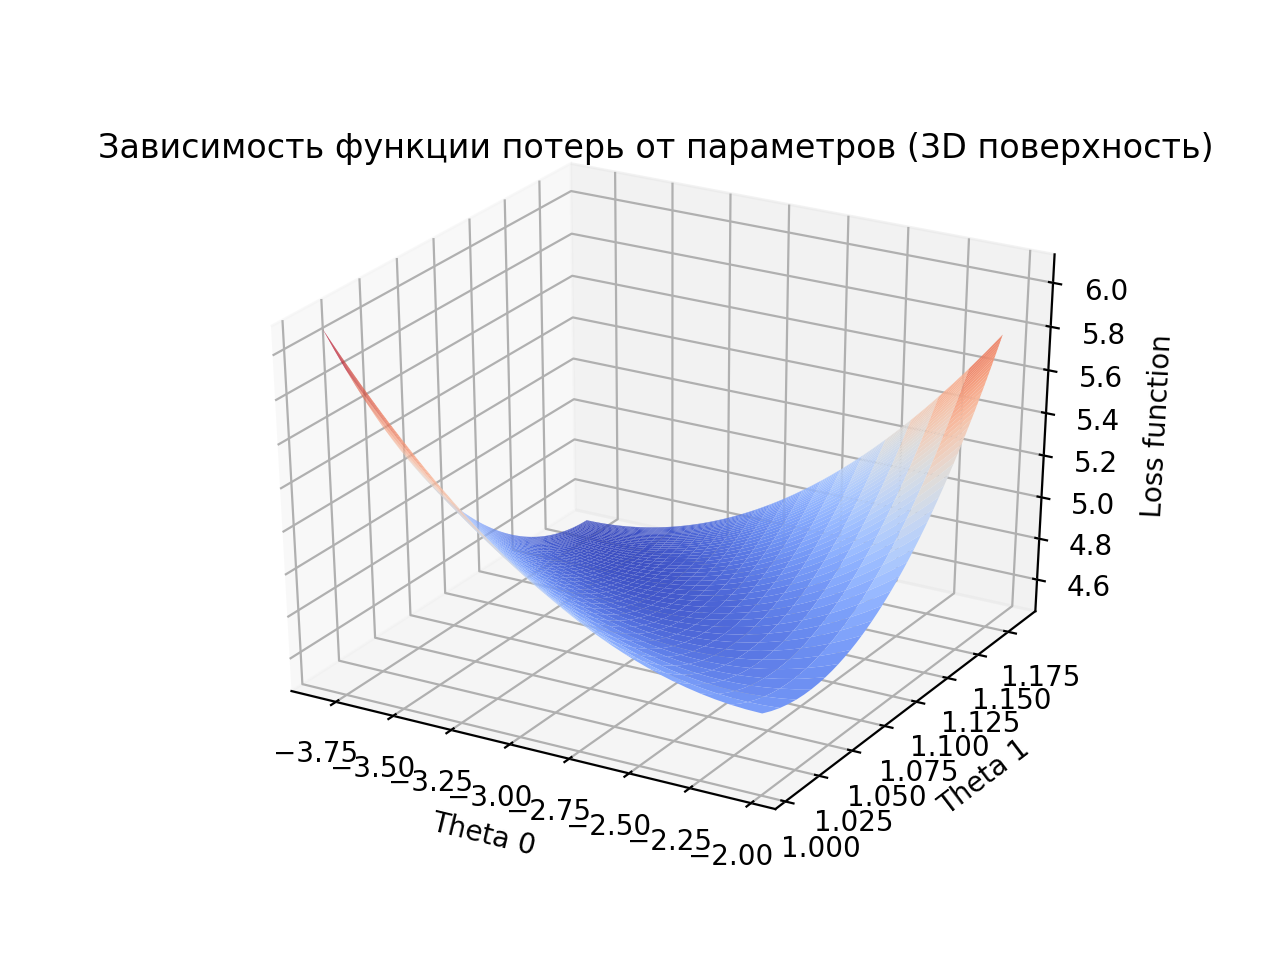

In [10]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0)
ax.set_title('Зависимость функции потерь от параметров (3D поверхность)')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Loss function')
plt.show()

<IPython.core.display.Javascript object>


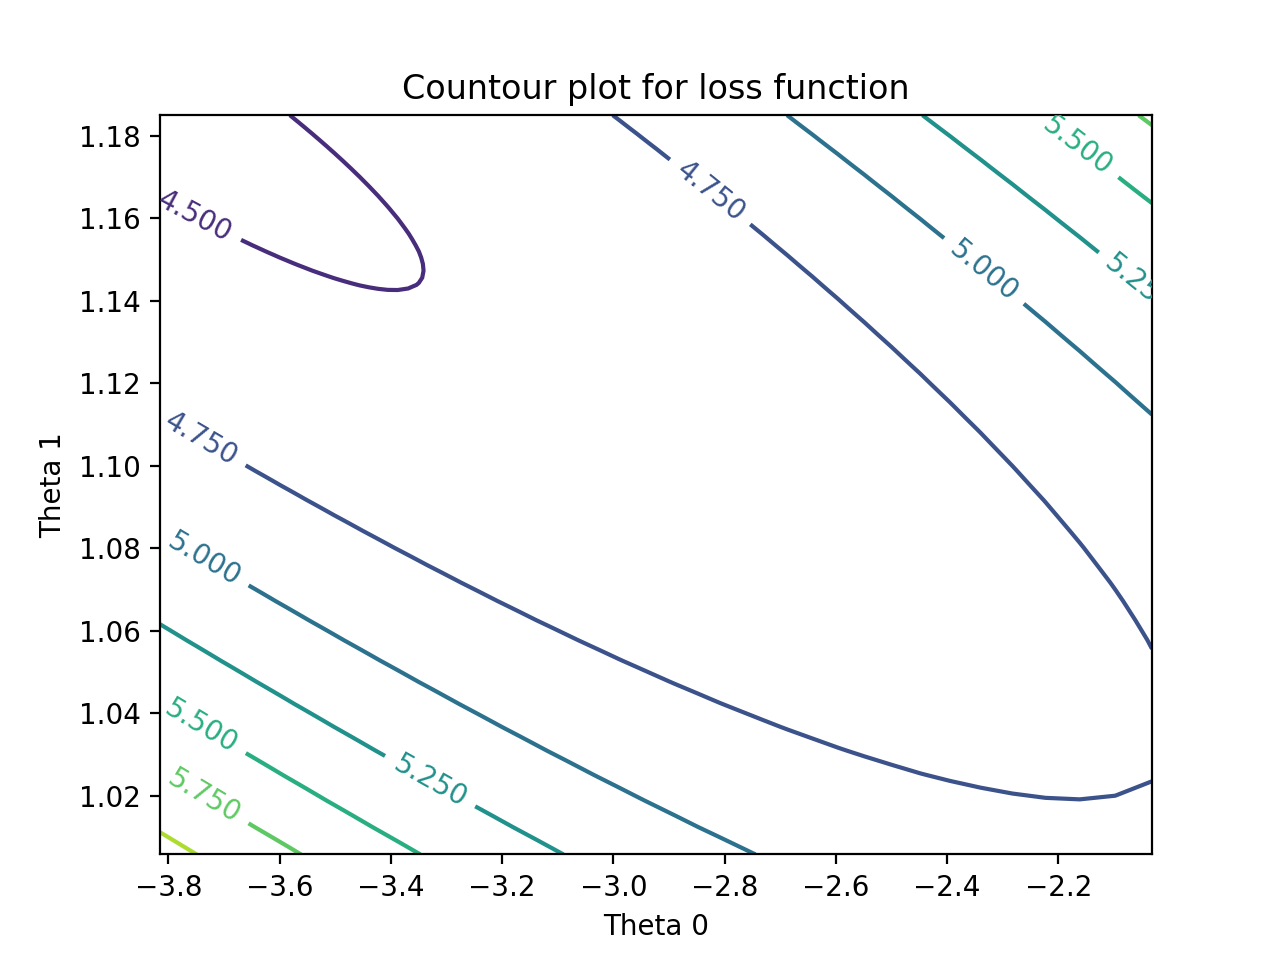

In [11]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, cmap='viridis')
ax.clabel(CS, inline=1, fontsize=10)
ax.set_title('Countour plot for loss function')
ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
plt.show()

# 6. Загрузите набор данных ex1data2.txt из текстового файла.

In [12]:
FILENAME2 = 'ex1data2.txt'
df = pd.read_csv(FILENAME2, header=None, names=['area', 'rooms', 'price'])
X_train, y_train = df.filter(['area', 'rooms']), df['price']
X_train

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,1985,4
6,1534,3
7,1427,3
8,1380,3
9,1494,3


Реализация линейной регресии с несколькими переменными объектно-ориентированном стиле.

In [13]:
class MultivariateLinearRegression:
    THRESHOLD = 1

    def __init__(self, max_steps=500000, linear_rate=0.01, normalize=True, vectorize=True, method=None):
        self.weights = None
        self.costs = []
        self.normalize = normalize
        self.vectorize = vectorize
        self.max_steps = max_steps
        self.linear_rate = linear_rate
        self.method = method

    def predict(self, X):
        if self.weights is None:
            raise Exception("Model is not trained. Call `fit` method.")

        A = np.insert(X, 0, 1)        
        return self._calculate_hypotesis(A)

    def fit(self, X, y):
        if hasattr(X, 'values'):
            X = X.values
        if hasattr(y, 'values'):
            y = y.values

        X = X.astype('float64') 
        y = y.astype('float64')

        if self.normalize:
            X = self.normalize_features(X)
        
        X = np.column_stack((np.ones(X.shape[0]), X))
        
        if self.method == 'normal_equation':
            self.weights = self.normal_equation(X, y)
            return
        
        self.weights = np.zeros(X.shape[1])
        cur_loss = self.cost_func(X, y)

        cur_step = 0
        while cur_step < self.max_steps:
            cur_step += 1
            self.gradient_descent(X,y)
            new_loss = self.cost_func(X, y)
            self.costs.append(new_loss)
            if abs(new_loss - cur_loss) < self.THRESHOLD:
                break

            cur_loss = new_loss

        self.steps = cur_step
            
    def normalize_features(self, X):
        N = X.shape[1]
        copy_X = X.copy()
        for i in range(N):
            feature = X[:, i]
            mean = np.mean(feature)
            delta = np.max(feature) - np.min(feature)            
            copy_X[:, i] -= mean
            copy_X[:, i] /= delta
        return copy_X
        
    def cost_func(self, X, y, weights=None):
        if weights is None:
            weights = self.weights

        predictions = self._calculate_hypotesis(X, weights)
        squared_error = (predictions - y) ** 2
        return np.mean(squared_error) / 2

    def normal_equation(self, X, y):
        return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def gradient_descent(self, X, y):
        predictions = self._calculate_hypotesis(X)
        diff = predictions - y
        if self.vectorize:
            self._gradient_descent_vectorized(X, diff)
        else:
            self._gradient_secent_simple(X, diff)
    
    def _calculate_hypotesis(self, X, weights=None):
        if weights is None:
            weights = self.weights
        
        return X.dot(weights)
    
    def _gradient_descent_vectorized(self, X, diff):
        gradient = np.dot(X.T, diff)
        gradient /= X.shape[0]
        gradient *= self.linear_rate
        self.weights -= gradient
    
    def _gradient_secent_simple(self, X, diff):
        feature_size = X.shape[1]
        for i in range(feature_size):
            self.weights[i] -= self.linear_rate * np.mean(X[:, i] * diff)

# 7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

Для справедливости сравнения задаются одинаковые параметры скорости схождения и количества шагов итерации.
Как видно из графиков, при обучении модели без нормализации функция стоимости расходится, а с нормализацией - за 100 шагов сходится к приличному результату.

<IPython.core.display.Javascript object>


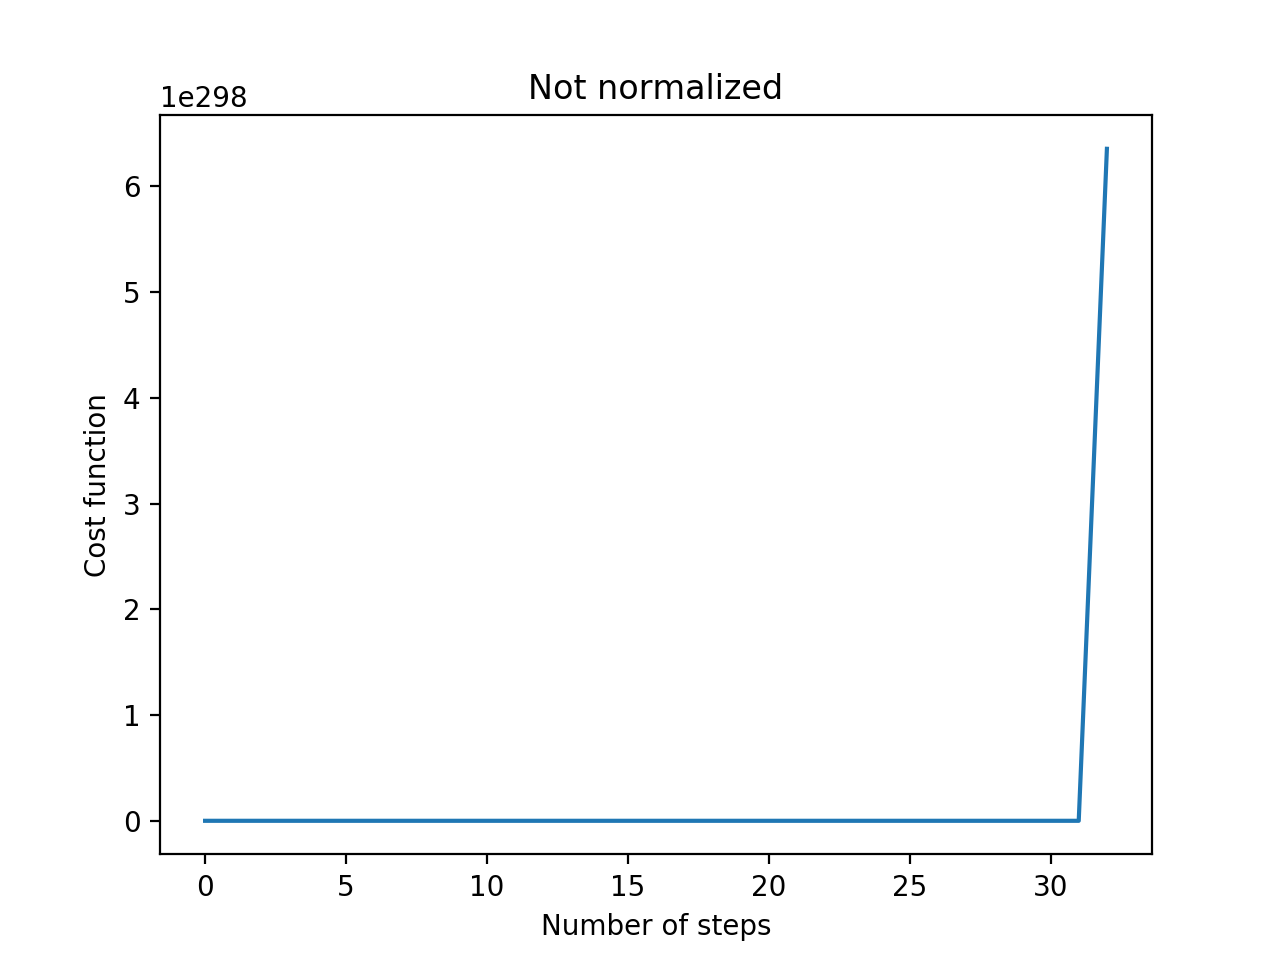

<IPython.core.display.Javascript object>


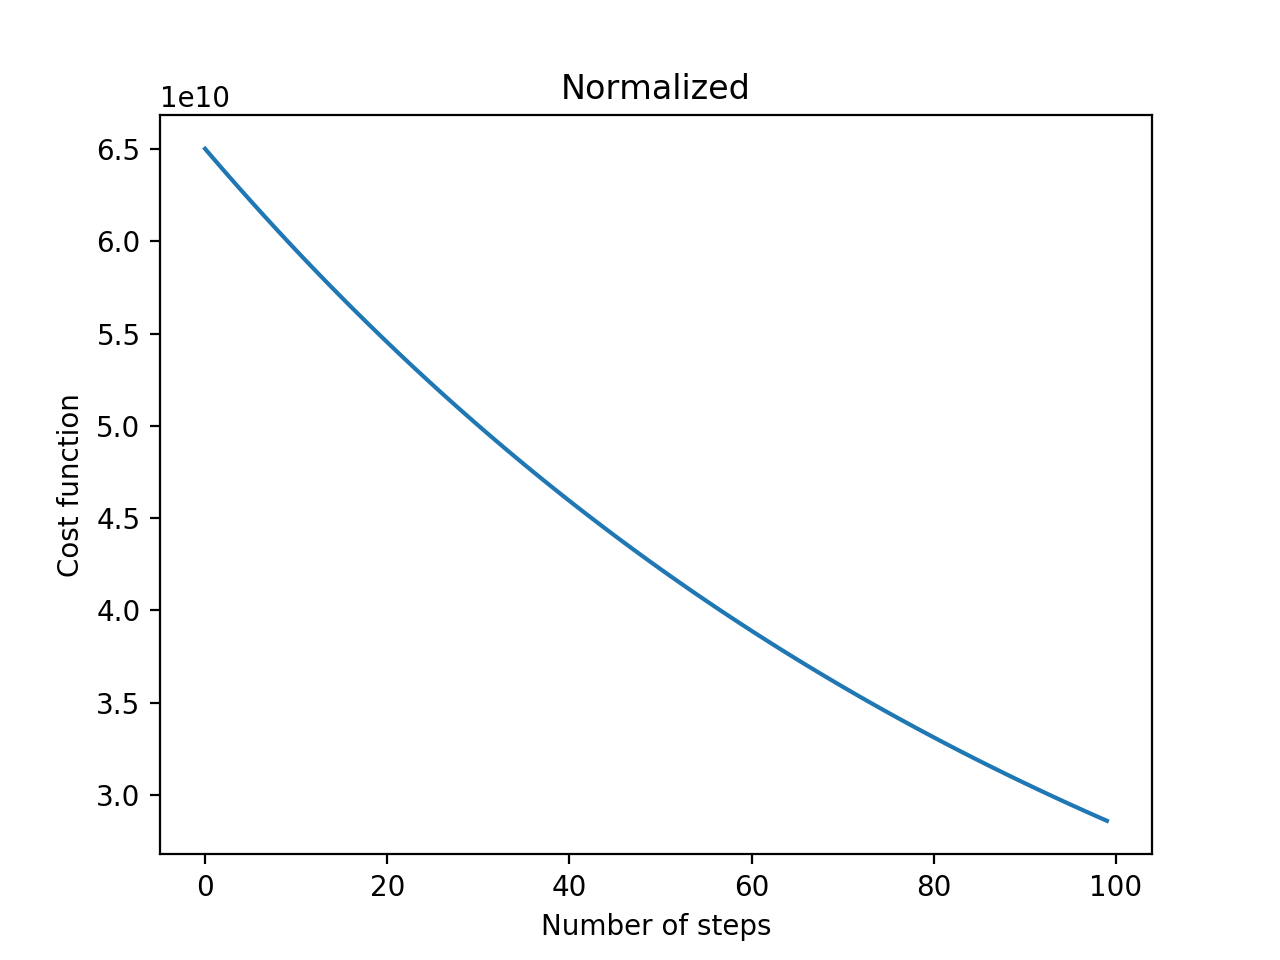

In [14]:
mult = MultivariateLinearRegression(max_steps=100, linear_rate=0.005, normalize=False)
mult.fit(X_train, y_train)
xi_nn, costs_non_normalized = list(range(mult.steps)), mult.costs

mult2 = MultivariateLinearRegression(max_steps=100, linear_rate=0.005, normalize=True)
mult2.fit(X_train, y_train)
xi_norm, costs_normalized = list(range(mult2.steps)), mult2.costs

fig, ax1 = plt.subplots()
ax1.plot(xi_nn, costs_non_normalized)
ax1.set_xlabel('Number of steps')
ax1.set_ylabel('Cost function')
ax1.set_title('Not normalized')

fig2, ax2 = plt.subplots()         
ax2.plot(xi_norm, costs_normalized)
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Cost function')
ax2.set_title('Normalized')
plt.show()

# 8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

Функция потерь реализована в классе `MultivariateLinearRegression` с названием `cost_func`, градиентный спуск - `_gradient_descent_vectorized`.

# 9. Покажите, что векторизация дает прирост производительности.

Для справедливости сравнения задаются одинаковые параметры скорости схождения.
Векторизация даёт прирост производительности за счёт работы оптимизированных алгоритмов `numpy` по умножению матриц, в то время как итеративный подход за счёт языка программирования производительность уменьшает.

In [15]:
from datetime import datetime
TIME_FORMAT = "%H:%M:%S"

mult = MultivariateLinearRegression(linear_rate=0.001, vectorize=False)
mult2 = MultivariateLinearRegression(linear_rate=0.001, vectorize=True)

start_time = datetime.now()
print(f"Start time without vectorization: {start_time.strftime(TIME_FORMAT)}")
mult.fit(X_train, y_train)
end_time = datetime.now()
print(f"End time without vectorization: {end_time.strftime(TIME_FORMAT)}\n")
spent_non_vec = end_time - start_time

start_time = datetime.now()
print(f"Start time with vectorization: {start_time.strftime(TIME_FORMAT)}")
mult2.fit(X_train, y_train)
end_time = datetime.now()
print(f"End time with vectorization: {end_time.strftime(TIME_FORMAT)}\n")
spent_vec = end_time - start_time

print(f"Spent time without vectorization: {spent_non_vec}")
print(f"Spent time with vectorization: {spent_vec}")

Start time without vectorization: 00:00:48
End time without vectorization: 00:01:00

Start time with vectorization: 00:01:00
End time with vectorization: 00:01:06

Spent time without vectorization: 0:00:12.212159
Spent time with vectorization: 0:00:05.885621


# 10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика. 

Сравнивается работа алгоритма при скорости обучения 0.1 и 0.01.
Исходя из графиков можно сделать вывод, что чем меньше значение, тем большее количество итераций проходит алгоритм, прежде чем дойдёт до оптимального значения весов. Однако это значение не должно быть слишком большим, иначе есть риск 'проскочить' минимум, и функция потерь будет расходящейся.

<IPython.core.display.Javascript object>


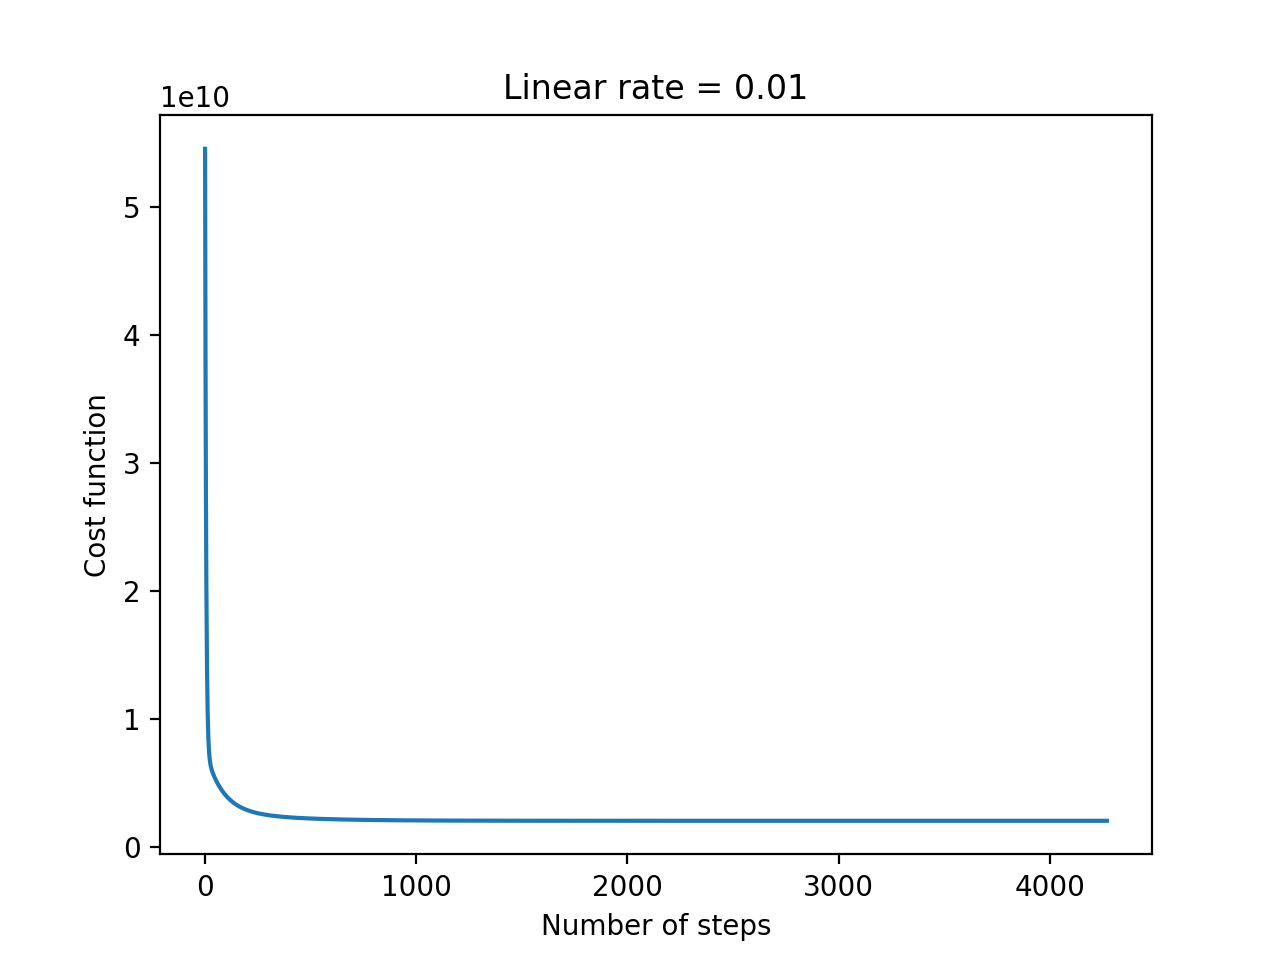

<IPython.core.display.Javascript object>


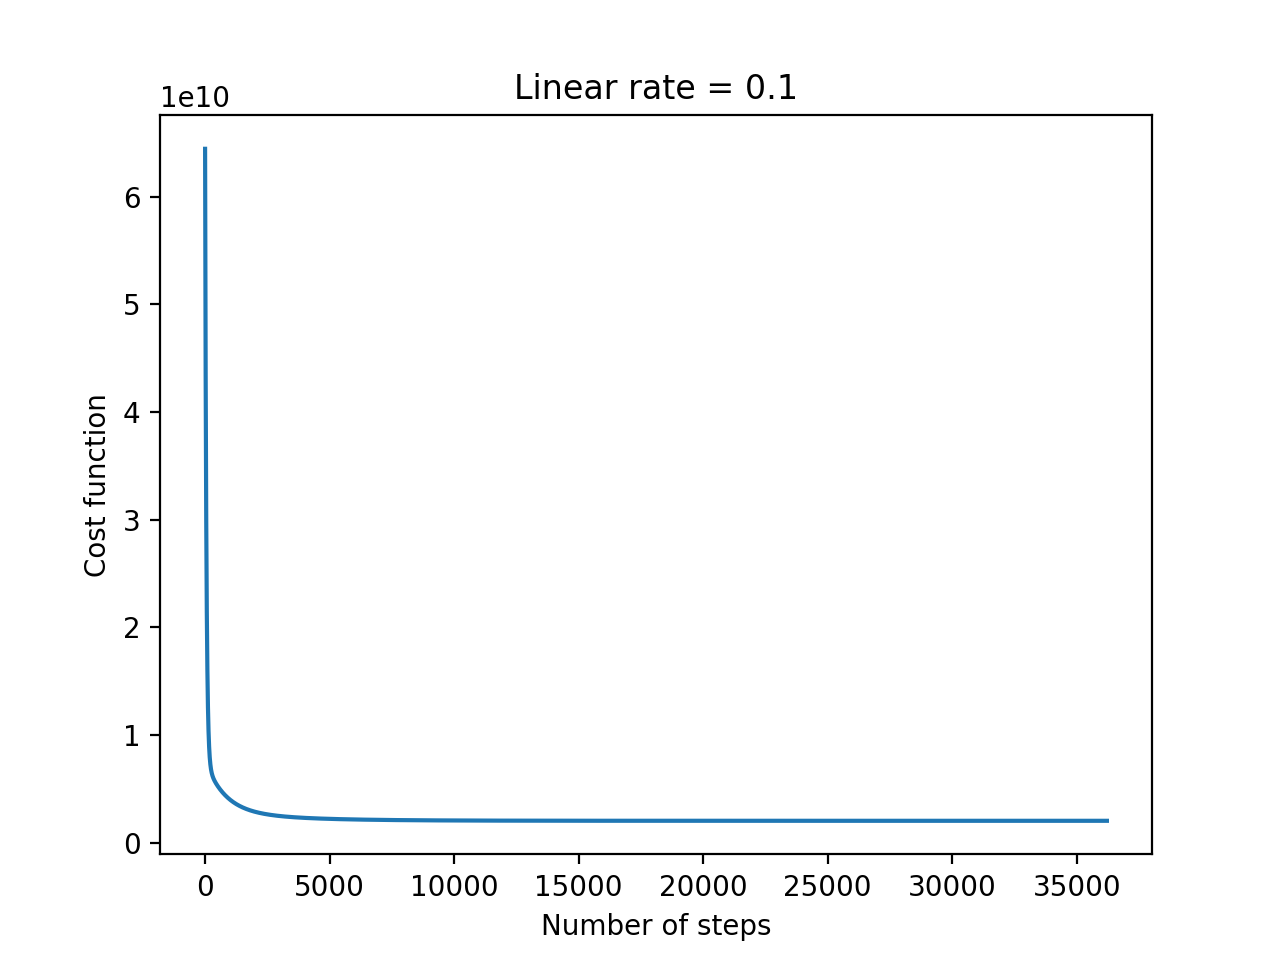

In [16]:
mult = MultivariateLinearRegression(linear_rate=0.1)
mult2 = MultivariateLinearRegression(linear_rate=0.01)
mult.fit(X_train, y_train)
mult2.fit(X_train, y_train)

xi1, costs1 = list(range(mult.steps)), mult.costs
xi2, costs2 = list(range(mult2.steps)), mult2.costs

fig, ax = plt.subplots()
ax.plot(list(range(mult.steps)), mult.costs)
ax.set_xlabel('Number of steps')
ax.set_ylabel('Cost function')
ax.set_title('Linear rate = 0.01')

fig, ax2 = plt.subplots()
ax2.plot(list(range(mult2.steps)), mult2.costs)
ax2.set_xlabel('Number of steps')
ax2.set_ylabel('Cost function')
ax2.set_title('Linear rate = 0.1')
plt.show()

# 11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

В первом случае используется метод наименьших квадратов, во втором - градиентный спуск.
Исходя из результатов можно сделать вывод, что, используя аналитический метод, минимум функции потерь достигается мгновенно и точно, в то время как градиентный бустинг лишь приблизительно достигает минимума, при этом занимая определённое количество времени.
Однако метод наименьших квадратов не стоит использовать при размере выборки >~ 10+e4, так переменожение матриц больших размеров, а также нахождение обратных матриц больших размеров влечёт большие затраты производительности, и не факт что машине хватит ресурсов, чтобы вернуть результат. В таких случаях целесообразней использовать градиентный бустинг.

In [17]:
mult = MultivariateLinearRegression(method='normal_equation', normalize=False)
mult.fit(X_train, y_train)
A = np.column_stack((np.ones(X_train.shape[0]), X_train))
cost_normal = mult.cost_func(A, y_train)

m = MultivariateLinearRegression(linear_rate=0.001)
m.fit(X_train, y_train)
cost_gradient = m.costs[-1]

print(f"Cost function with analytical approach: {cost_normal}")
print(f"Cost function with gradient descent: {cost_gradient}")

Cost function with analytical approach: 2043280050.602829
Cost function with gradient descent: 2043308389.1134632
